In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [3]:
custom = {"axes.edgecolor": "black", "grid.linestyle": "dashed", "grid.color": "gray"}
sns.set_style("darkgrid", rc = custom)

### $\text{Let`s create a dataset for our model}$

In [4]:
classif = make_classification(n_samples=1000,
                              n_features=2,
                              n_classes=2, 
                              n_redundant=0,
                              class_sep=2.0,
                              n_clusters_per_class=1,
                              random_state=42)

In [5]:
data = pd.DataFrame({'feature_1': classif[0][:, 0], 
                     'feature_2': classif[0][:, 1], 
                     'target':    classif[1]})
data

,feature_1,feature_2,target
0,1.601034,2.535353,1
1,1.755945,-2.172352,0
2,2.354479,-1.948528,0
3,4.103090,-0.766515,0
4,1.753178,1.787514,1
...,...,...,...
995,2.713939,1.451639,1
996,2.509473,-1.794996,0
997,3.844315,1.211294,1
998,0.974124,2.619258,1


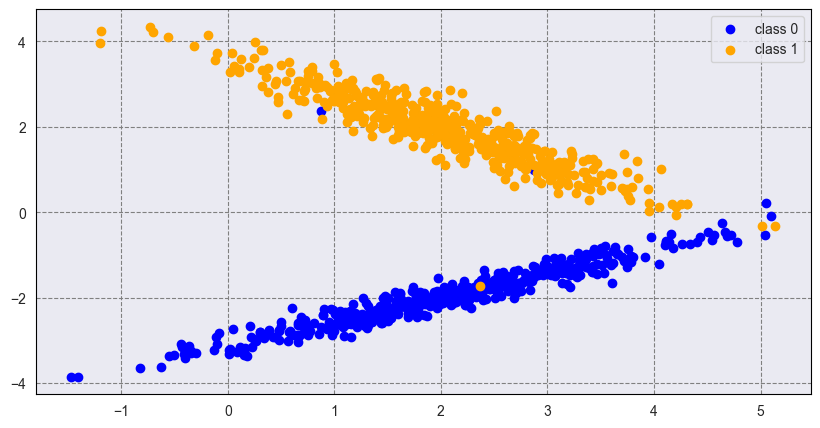

In [6]:
plt.figure(figsize=(10, 5))
plt.scatter(data[data['target']== 0]['feature_1'], 
            data[data['target']==0]['feature_2'],
            color='blue',
            label='class 0')

plt.scatter(data[data['target']== 1]['feature_1'], 
            data[data['target']== 1]['feature_2'],
            color='orange',
            label='class 1')
plt.legend()
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data[['feature_1', 'feature_2']].iloc[:],
                                                    data['target'], 
                                                    test_size=0.2, 
                                                    random_state=42)

### $\text{Model stucture}$

### $\text{Formulas, that I will use:}$
### $$\sigma(z) = \frac{1}{1 - e^{-z}}$$
### $\text{where:}$
### $$z = \left\langle w, x_i \right\rangle$$
### $\text{Next:}$
### $$\nabla_w L(y, X, w, b) = -\sum_{i} x_i(y_i - \sigma(\left\langle w, x_i \right\rangle))$$
### $$\nabla_b L(y, X, w, b) = -\sum_{i} y_i - \sigma(\left\langle w, x_i \right\rangle)$$

In [8]:
class LogisticRegression():
    def __init__(self, n_iter = 1000, lr = 0.01, reg_lambda=0.001):
        self.n_iter = n_iter
        self.lr = lr
        self.reg_lambda = reg_lambda
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_rows, n_columns = X.shape
        np.random.seed(42)
        self.w = np.random.randn(n_columns)
        self.b = 0

        for _ in range(self.n_iter):
            d_w = np.zeros(n_columns)
            d_b = 0
            prediction = self.sigmoid(X)
            # print(f'prediction shape = {prediction.shape}')
            
            d_w = 1 / n_rows * np.dot(X.T, prediction - y)
            # print(f'd_w: {d_w}')
            # print(f'd_w shape: {d_w.shape}')
            d_b = 1 / n_rows * np.sum(prediction - y)
            # print(f'd_b: {d_b}')
            # print(f'd_b shape: {d_b.shape}')

            self.w -= self.lr * (2 * self.reg_lambda * self.w + d_w)
            self.b -= self.lr * d_b

    def sigmoid(self, X):
        z = np.dot(X, self.w) + self.b
        return 1 / (1 + np.exp(-z))
    
    def predict(self, X, treshold=0.5):
        if treshold >= 0 or treshold <= 1:
            prediction = self.sigmoid(X)
            return (prediction >= treshold).astype(int)
        else:
            raise NameError('treshold must be in  range (0, 1)')

In [9]:
model = LogisticRegression()
model.fit(X_train, y_train)

### $\text{Let`s show how our model works}$

In [10]:
prediction = model.predict(X_test)

In [129]:
accur = accuracy_score(y_test, prediction)
f_1 = f1_score(y_test, prediction)
print(f'Accuracy = {accur}')
print(f'f1_score = {f_1}')

Accuracy = 0.995
f1_score = 0.9948186528497409


In [17]:
w1 = model.w[0]
w2 = model.w[1]
b =  model.b

x1 = np.linspace(data['feature_1'].min(), data['feature_1'].max(), 500)
sep_line = -(w1*x1 + b) / w2

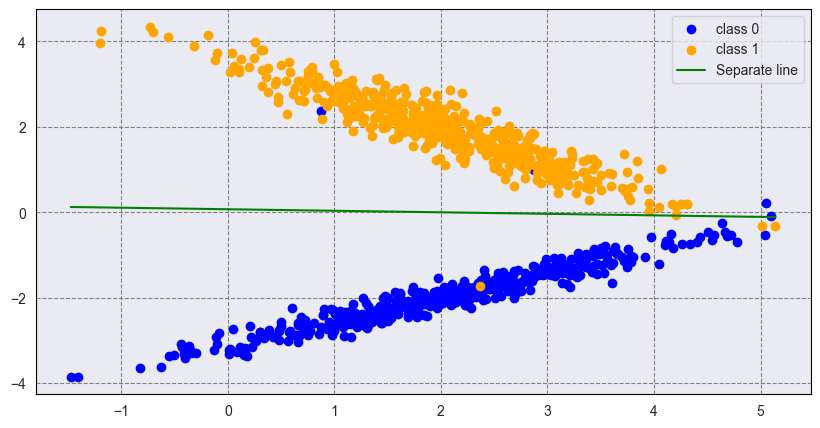

In [20]:
plt.figure(figsize=(10, 5))
plt.scatter(data[data['target']== 0]['feature_1'], 
            data[data['target']==0]['feature_2'],
            color='blue',
            label='class 0')

plt.scatter(data[data['target']== 1]['feature_1'], 
            data[data['target']== 1]['feature_2'],
            color='orange',
            label='class 1')
plt.plot(x1, 
         sep_line,
         label='Separate line',
         color='green')
plt.plot()
plt.legend()
plt.show()